# Use case
I recently finished a project at work revising the content and delivery of survey feedback requests. My hope is that the revisions will increase the number of respondents and the quality of the data being generated. At the same time, I want to move beyond simple vanity reporting (e.g., NPS calculations) and actually start using the data to make meaningful change. I want to learn, amongst other things, what the general sentiment is amongst respondents, and whether there are any trends that can be explored further. 

The model here is by no means stand alone; the intent is for quality focused colleagues to use it to make their own analyses more efficient.

The data used here is product feedback data from Amazon (specifically the book The Martian, by Andy Weir) which was downloaded using the Amazon Reviews Exported plugin for Chrome. The method used is broadly applicable to any data containing free text feedback from an end user.

In [4]:
### Install libraries
install.packages("tm")
install.packages("wordcloud")
install.packages("syuzhet")
install.packages("dplyr")
install.packages("tidyverse")

library(tm)
library(wordcloud)
library(syuzhet)
library(dplyr)
library(tidyverse)

also installing the dependencies 'NLP', 'slam'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tomro\AppData\Local\Temp\RtmpEDun4B\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tomro\AppData\Local\Temp\RtmpEDun4B\downloaded_packages


also installing the dependencies 'textshape', 'dtt'




  There is a binary version available but the source version is later:
          binary source needs_compilation
textshape  1.7.1  1.7.3             FALSE

package 'dtt' successfully unpacked and MD5 sums checked
package 'syuzhet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tomro\AppData\Local\Temp\RtmpEDun4B\downloaded_packages


installing the source package 'textshape'

also installing the dependencies 'ellipsis', 'glue', 'lifecycle', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
tibble  3.1.1  3.1.2              TRUE
pillar  1.6.0  1.6.1             FALSE
dplyr   1.0.6  1.0.7              TRUE

  Binaries will be installed
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tomro\AppData\Local\Temp\RtmpEDun4B\downloaded_packages


installing the source package 'pillar'

also installing the dependencies 'fs', 'rappdirs', 'processx', 'xfun', 'blob', 'data.table', 'gargle', 'ids', 'rematch2', 'isoband', 'cpp11', 'callr', 'knitr', 'withr', 'broom', 'cli', 'crayon', 'dbplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'ggplot2', 'haven', 'hms', 'httr', 'jsonlite', 'lubridate', 'magrittr', 'modelr', 'purrr', 'readr', 'reprex', 'rstudioapi', 'rvest', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
xfun          0.22   0.24              TRUE
gargle       1.1.0  1.2.0             FALSE
cpp11        0.2.7  0.3.1             FALSE
broom        0.7.6  0.7.8             FALSE
cli          2.5.0  3.0.0              TRUE
googledrive  1.0.1  2.0.0             FALSE
ggplot2      3.3.3  3.3.5             FALSE
hms          1.0.0  1.1.0             FALSE

  Binaries will be installed
package 'fs' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'isoband' suc

Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tomro\anaconda3\envs\R\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\tomro\anaconda3\envs\R\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'lubridate' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'modelr' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'reprex' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'rvest' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'xml2' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tomro\AppData\Local\Temp\RtmpEDun4B\downloaded_packages


installing the source packages 'gargle', 'cpp11', 'broom', 'googledrive', 'ggplot2', 'hms'

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'syuzhet' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [ ]:
### Import data
martian <- read.csv(url("https://raw.githubusercontent.com/dogwhine/Sentiment-Analysis-with-R/main/The%20Martian.csv"))

In [7]:
### Check the structure of the file
str(martian)

'data.frame':	5000 obs. of  8 variables:
 $ id         : Factor w/ 5000 levels "R1008HMCLRYKEP",..: 4095 1735 2810 2408 4777 3694 4846 3593 443 2504 ...
 $ profileName: Factor w/ 4343 levels "\"smeghead54\"",..: 4204 1826 1589 3151 927 542 3043 766 658 2541 ...
 $ text       : Factor w/ 4880 levels "\n  'The  Martian' gets a five star because of the sheer audacity required to tackle a book like this, I was to"| __truncated__,..: 4790 3503 2060 2830 2598 3858 4199 2237 2413 3824 ...
 $ date       : Factor w/ 1506 levels "Reviewed in the United Kingdom on 1 April 2013",..: 1404 399 1349 687 1496 1298 1262 678 421 1416 ...
 $ title      : Factor w/ 3177 levels "'Gravity' for Grown Ups",..: 1004 1949 1858 502 2519 2115 676 277 380 3127 ...
 $ rating     : int  5 5 4 4 5 5 5 5 4 4 ...
 $ images     : Factor w/ 4 levels "","https://images-na.ssl-images-amazon.com/images/I/613AoVoQYkL.jpg\nhttps://images-na.ssl-images-amazon.com/image"| __truncated__,..: 1 1 1 1 1 1 1 1 1 1 ...
 $ helpful    

I'm specifically interested in the text column, but later I could use the rating variable to see how accurate my analysis is.

For the next step I need to create a corpus. A corpus is a large, structured set of texts. For this I will use the iconv function, useful for converting value labels into a coding used for text analytics.

In [11]:
### Create the corpus
corpus <- iconv(martian$text)
corpus <- Corpus(VectorSource(corpus))

In [10]:
### Inspect the corpus
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] \n  When six astronauts from the Ares 3 mission land on Acidalia Planitia, a flat area on the planet Mars, they expect to leave after about 30 days. Then a serious storm blows in, creating chaos and causing the mission to be abandoned within the first week. During the storm, astronaut Mark Watney, a botanist and mechanical engineer, is injured while the team struggles to get to the Mars Ascent Vehicle, and all signs indicate that he is dead as he lies there in the red dust. Soon afterwards, he regains consciousness only up to find himself alone and the sole inhabitant of an entire planet. This should have been petrifying but Mark Watney is an amazingly resourceful survivor and, despite everything, manages to maintain a rather quirky sense of humour throughout his ordeal. Meanwhile, the other Ares 3 crew members are on their way to Earth and mourning his loss, while Mindy Park from Sa

Before any sentiment analysis can take place I need to clean the corpus. I will make everything lower case, remove punctuation, numbers, stop words and whitespace.

In [12]:
### Clean the corpus
corpus <- tm_map(corpus, tolower)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, stripWhitespace)

martian_final <- corpus

Warning message in tm_map.SimpleCorpus(corpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"

Next I need to convert the cleaned corpus into a term document. A term document is a means to represent words in text as a matrix. Columns in the matrix represent reviews, and words represent word occurence.

In [13]:
### Create term document
tdm <- TermDocumentMatrix(martian_final)
tdm <- as.matrix(tdm)

In [14]:
### Inspect the term document
tdm[1:10, 1:5]

,1,2,3,4,5
abandoned,1,1,0,0,0
able,1,0,0,0,0
absorb,1,0,0,0,0
absorbed,1,0,0,0,0
according,1,0,0,0,0
achieving,1,0,0,0,0
acidalia,3,0,0,0,0
acronyms,1,0,0,0,0
action,1,0,0,0,0
activity,1,0,0,0,0


With the data prepared I can now start to visualise the result.

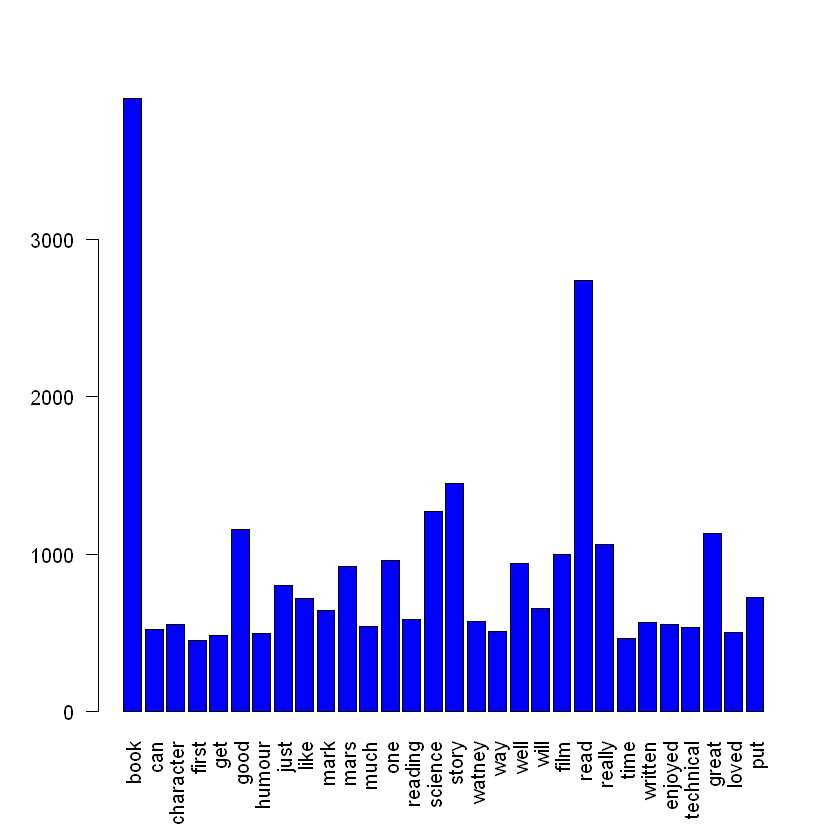

In [16]:
### Visualise the term document as a bar chart
w <- rowSums(tdm)
w <- subset(w, w >= 450) ### Only returns frequencies >= 450. Setting the threshold too low will make the chart unreadable
barplot(w, las = 2, col = "blue")

I'm seeing a high occurence of the words "book", "read" and "story". None of these words are particularly useful here, so I'm going to remove them from the corpus and refresh.

Warning message in tm_map.SimpleCorpus(corpus, removeWords, c("book", "read", "story")):
"transformation drops documents"

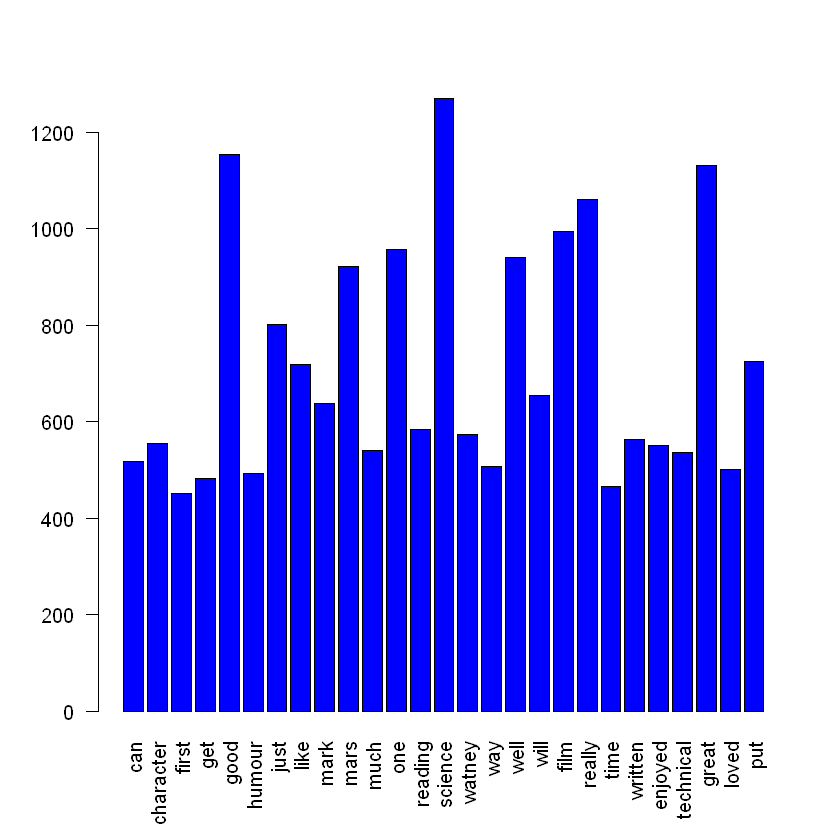

In [19]:
### Remove superfluous words and refresh
corpus <- tm_map(corpus, removeWords, c("book", "read", "story"))

martian_final <- corpus

tdm <- TermDocumentMatrix(martian_final)
tdm <- as.matrix(tdm)

w <- rowSums(tdm)
w <- subset(w, w >= 450)
barplot(w, las = 2, col = "blue")

Superfluous words still exist in the dataset, but I can see some indication of positive sentiment coming through. I can create a word cloud to explore further.

Warning message in brewer.pal(25, "Dark2"):
"n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
"

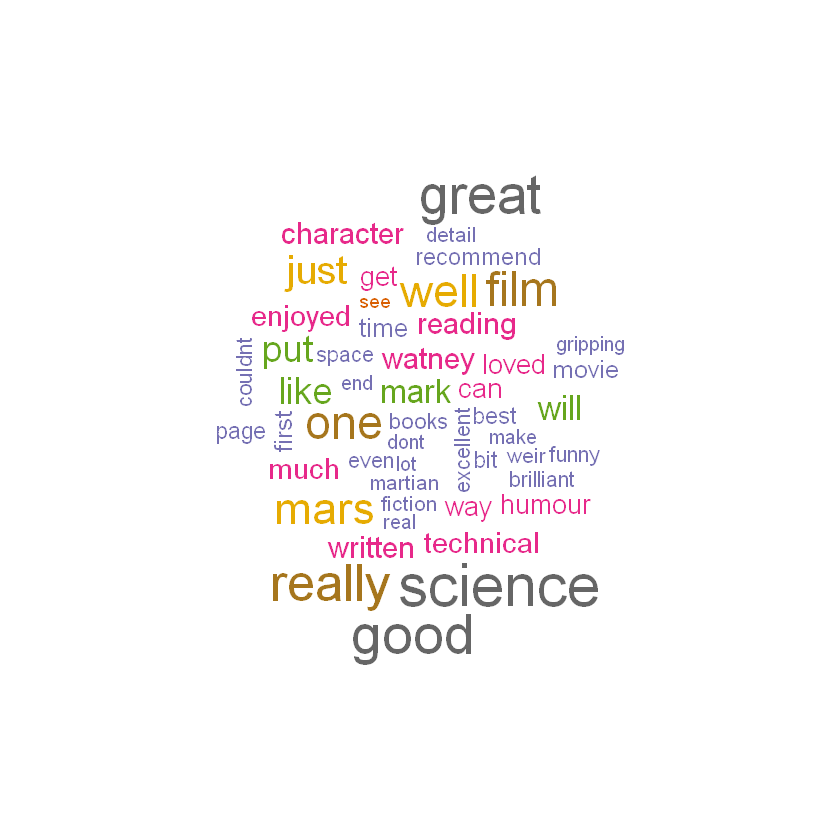

In [20]:
### Create word cloud
w <- sort(rowSums(tdm), decreasing = T)
set.seed(2000)
wordcloud(words = names(w),
         freq = w,
         max.words = 50,
         random.order = T,
         min.freq = 70,
         colors = brewer.pal(25, "Dark2"),
         scale = c(3, 0.3))



"good", "humour", "enjoyed", "great", "excellent", "recommend" and "loved" and all reoccuring words.